# WeRateDogs project

## Project orientation

- WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 
- My task is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. 
- Provided/needed data include: 

  -- Enhanced Twitter Archive (csv file - provided by Udacity (downloadable)) that contains basic tweet data for all 5000+ of their tweets, but not everything. After filtering by Udacity team, the file contained tweet's text, rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo), and 2356 tweets with ratings only.
  
  -- Image Predictions File (tsv file), obtained by using 'requests' library and the provided url from Udacity. images were generated by neural network that can classify breeds of dogs. The resultant table includes image predictions (the top three only) for each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).
  
  -- Additonal information gathered from Twitter API as json txt file that has been converted into dataframe and filtered to contain only id, retweet_count and favorite(like)_count columns.
  
- The three datasets have been converted into dataframes for assessing and cleaning prior to performing the analyses and visualization.
- The dataframes have been explored manually and programmatically
- After cleaning, the three dataframes were merged in one dataframe and saved as (twitter_archive_master.csv) file.
- Then, analyses and visualization were conducted.
- Finally, the results have been interpreted and concluded in a brief report.


In [102]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import requests
import tweepy
import json
import re
import datetime as dt

In [103]:
os.getcwd()

'/home/workspace'

In [104]:
ls

act_report.pdf         retweet_fav_corr.png        twitter-archive-enhanced.csv
dog_stage.png          source.png                  twitter_archive_master.csv
image_predictions.tsv  Top10_DogBreed pieplot.png  wrangle_act.ipynb
name.png               tweet_json.txt              wrangle_report.pdf
rating.png             tweet_source.png


# Gather data

### Gather the first file (twitter-archive-enhanced.csv) by downloaing from Udacity webpage then uploading to the workspace

In [3]:
#reading twitter-archive-enhanced.csv in pandas dataframe and 
#exploring the file content (top 5 entries)
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
# Display the last 5 entries
df_archive.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [6]:
df_archive.shape

(2356, 17)

## Gather the second file (image_predictions.tsv) by using requests library and the provided url

In [10]:
#Download image_predictions.tsv file using requests library
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#Then save tsv to file
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [7]:
#load image_predictions.tsv as a pandas dataframe
df_image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

In [8]:
#explore the image_predictions file content
df_image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
#explore the last 5 entries
df_image_predictions.tail(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [10]:
df_image_predictions.shape

(2075, 12)

## Gather the third file (tweet-json.txt) via Twitter API

In [30]:
# Authentication Details
consumer_key = '************************' 
consumer_secret = "****************************************" 
access_token = '************************************************' 
access_secret = '****************************************' 

In [32]:
# variables for Twitter API connection 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_token, access_secret) 
api = tweepy.API(auth, wait_on_rate_limit = True) 

In [42]:
# Creating a file for the tweets' text data
errors = []
if not os.path.isfile('tweet_json.txt'):
    # create the file and write on it
    with open ('tweet_json.txt', 'w') as file:
        for tweet_id in df_archive['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True, tweet_mode = 'extended')
                json.dump(status._json, file)
                file.write('\n')
            except Exception as e:
                print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                errors.append(tweet_id)

Error on tweet id 888202515573088257;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 873697596434513921;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 872668790621863937;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 872261713294495745;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 869988702071779329;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 866816280283807744;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 861769973181624320;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 856602993587888130;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 851953902622658560;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 845459076796616705;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 844704788403

In [43]:
#Test api object to view one tweet of my choice
exp_tweet = api.get_status(df_archive.tweet_id[1050], tweet_mode = 'extended')
content = exp_tweet._json
content

{'created_at': 'Wed Jun 15 22:36:19 +0000 2016',
 'id': 743210557239623680,
 'id_str': '743210557239623680',
 'full_text': "Meet Kayla, an underground poker legend. Players lose on purpose hoping she'll let them pet her. 10/10 strategic af https://t.co/EkLku795aO",
 'truncated': False,
 'display_text_range': [0, 115],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 743210550650376192,
    'id_str': '743210550650376192',
    'indices': [116, 139],
    'media_url': 'http://pbs.twimg.com/media/ClBqDuDWkAALK2e.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/ClBqDuDWkAALK2e.jpg',
    'url': 'https://t.co/EkLku795aO',
    'display_url': 'pic.twitter.com/EkLku795aO',
    'expanded_url': 'https://twitter.com/dog_rates/status/743210557239623680/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 604, 'h': 453, 'resize': 'fit'},
     'medium': {'w': 604, 'h': 453, 'resiz

In [11]:
df_api = pd.read_json('tweet_json.txt', lines = True)

In [12]:
df_api.shape

(2331, 32)

In [13]:
#check for non-values
df_api.isnull().any()

contributors                      True
coordinates                       True
created_at                       False
display_text_range               False
entities                         False
extended_entities                 True
favorite_count                   False
favorited                        False
full_text                        False
geo                               True
id                               False
id_str                           False
in_reply_to_screen_name           True
in_reply_to_status_id             True
in_reply_to_status_id_str         True
in_reply_to_user_id               True
in_reply_to_user_id_str           True
is_quote_status                  False
lang                             False
place                             True
possibly_sensitive                True
possibly_sensitive_appealable     True
quoted_status                     True
quoted_status_id                  True
quoted_status_id_str              True
quoted_status_permalink  

In [14]:
#We are interested in the tweet_id, retwet_count, and favorite_count
#let us extract the columns of interest in our project using filter method
df_api_extract = df_api.filter(['id', 'retweet_count', 'favorite_count'], axis=1)

In [15]:
#explore the dataframe after filtering
df_api_extract.head(5)

,id,retweet_count,favorite_count
0,892420643555336193,7490,35458
1,892177421306343426,5558,30691
2,891815181378084864,3681,23087
3,891689557279858688,7665,38754
4,891327558926688256,8267,37030


In [16]:
#check the basic structural information of the dataframe
df_api_extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id                2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


# Assessing data

## Now we have 3 dataframes 
- df_archive
- df_image_predictions
- df_api_extract

## Quality

- df_archive (twitter-archive-enhanced.csv file) has 2356 entries and 17 columns, with missing values in different columns that will be explicitly described below. N.B. no duplicates detected here.

- df_image_predictions.csv file has 2075 entries and 12 columns, no missing values. N.B. no duplicates were detected here.

- df_api_extract (filtered tweets-json.txt file) has 2331 entries and 32 columns, however, we are interested in only tweet_id, retweet_count, and favorite_count columns. We neither find duplicated nor missing values in this file.


We found the following quality issues:

1- Quality 1 (validity and consistency): dtype of tweet_id in all dataframes is integer, so we need to convert it into a string to avoid performing any mathematical calculation on that column. The dtype of timestamp column in df_archive is object and better to be converted into datetime (might be used in the future analysis).

2- Quality 2 (consistency): id column in df_api should be renamed as tweet_id, so that will enable us to combine the 3 datasets on tweet_id as a parent key


3- Quality 3 (completeness and consistency): some data entries in df_archive don't have image url, so we should filter records with incomplete information by using tweet_id in df_image_predictions as a guide.


4- Quality 4 (accuracy and completeness): 78 entries in in_reply_to_status_id   and 181 retweets in column retweeted_status_id,  however, we are interested in only the original tweets.  So, these are redundant information and hence we should remove retweets and replies from archive dataframe.

5- Quality 5 (consistency): filter image_prediction dataframe from retweet and replies records by matching against the cleaned df_archive dataframe using tweet_id as a guide.


6- Quality 6: columns; in_reply_to_id, in_reply_to_user_id, retweeted_status_ id, retweeted_status_user_id and retweeted_status_timestam column are redundant useless columns and should be dropped from archive dataframe.
 
7- Quality 7: The last four columns including dogs' developmental stages have None values and should be replaced with pandas NaN values.

8- Quality 8 (accuracy): The column rating_numerator has erroneous values that should be fixed by extracting the correct values from their corresponding texts.


9- Quality 9 (accuracy): The column name has erroneous and None values and that need to be fixed by extracting the correct names from the text and replacing 'None' values with pandas nans, respectively.

10- Quality 10 (accuracy): The information in column source need to be cleanly extracted from the HTML tag. 



## Tidiness
- We found the following issues:

1- Tidiness 1: In df_archive, dogs developemntal stages is displayed in 4 columns, however, they should be merged as one variable in one single column (Column headers are values, not variable names.)

2- Tidiness 2: In df_image_predictions, it is better to rename columns of (p, p_conf, and p_dog) with descriptive names to make them more understood.

3- Tidiness 3: Each type of observational unit forms a separate table. In other word, df_image_predictions and df_api are displaying some extra attributes of the tweets in the archive dataframe. So, after completeing both quality and tidiness checks, it is better to combine the 3 dataframes in one pandas dataframe for downstream analysis and visualization.


## Check df_archive for quality and tidiness assessemnet

In [17]:
#Getting the basic information of the dataframe including 
#number of data entries (rows),columns, datatype and memory usage 
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
#check 10 random records
df_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1990,672640509974827008,NaN,NaN,2015-12-04 04:56:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leonidas. He just got rekt by a snowba...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672640509...,9,10,Leonidas,None,None,None,None
2291,667165590075940865,NaN,NaN,2015-11-19 02:20:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Churlie. AKA Fetty Woof. Lost eye savi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667165590...,10,10,Churlie,None,None,None,None
339,832273440279240704,NaN,NaN,2017-02-16 17:00:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Smiley. He's a blind therapy dogg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832273440...,14,10,Smiley,doggo,None,None,None
1934,674014384960745472,NaN,NaN,2015-12-07 23:55:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Aiden. His eyes are magical. Love...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674014384...,11,10,Aiden,None,None,None,None
2145,669926384437997569,NaN,NaN,2015-11-26 17:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've never seen a dog so genuinely happy about...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669926384...,12,10,None,None,None,None,None
1273,709207347839836162,NaN,NaN,2016-03-14 02:39:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's trying on her prom dress....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709207347...,11,10,Penny,None,None,None,None
1888,674781762103414784,NaN,NaN,2015-12-10 02:44:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Bedazzled pup here. Fashionable af. Super yell...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674781762...,8,10,None,None,None,None,None
1013,747219827526344708,NaN,NaN,2016-06-27 00:07:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Atticus. He's remaining calm but his c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747219827...,11,10,Atticus,None,None,None,None
2200,668655139528511488,NaN,NaN,2015-11-23 04:59:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Winifred. He is a Papyrus Hydrang...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668655139...,11,10,Winifred,None,None,None,None
1499,692187005137076224,NaN,NaN,2016-01-27 03:26:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a rare Arctic Wubberfloof. Unamused by...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692187005...,12,10,a,None,None,None,None


In [19]:
#check for any non-values
df_archive.isnull().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

In [20]:
#check for any duplicates
df_archive.duplicated().any()

False

In [21]:
# Check for descriptive statistics to explore outliers
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [22]:
# Check number of values in the source column 
df_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [23]:
#check value counts of name column (get more familiar with the data)
df_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Tucker       10
Lola         10
Penny        10
Winston       9
Bo            9
Sadie         8
the           8
an            7
Toby          7
Buddy         7
Bailey        7
Daisy         7
Koda          6
Oscar         6
Milo          6
Stanley       6
Rusty         6
Leo           6
Bella         6
Jax           6
Scout         6
Dave          6
Jack          6
George        5
           ... 
Eriq          1
Vinnie        1
Gert          1
Kuyu          1
Amélie        1
Amy           1
Blue          1
Joey          1
Pete          1
Odin          1
Rodman        1
Dixie         1
Shadoe        1
Winifred      1
Huxley        1
Cedrick       1
Yukon         1
Toffee        1
Mona          1
Ralphé        1
Tyrus         1
Ember         1
Millie        1
Jennifur      1
Andy          1
Chadrick      1
space         1
Antony        1
Tycho         1
Obie          1
Name: name, Length: 957,

In [24]:
#check value counts of rating_numerator (get more familiar with the data)
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [25]:
#check value counts of rating_denominator (get more familiar with the data)
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

## Check df_image_predictions for quality and tidiness assessement

In [26]:
#display the basic structural information of image_predictions file
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
#check for any duplicates
df_image_predictions.duplicated().any()

False

In [28]:
#check for non-values
df_image_predictions.isnull().any()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

## Check df_api_extract for quality and tidiness assessement

In [29]:
#display the basic structural information 
df_api_extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id                2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [30]:
#check for non-value entries
df_api_extract.isnull().any()

id                False
retweet_count     False
favorite_count    False
dtype: bool

In [31]:
#check for duplicates
df_api_extract.duplicated().any()

False

# Clean data
## First create a copy for each dataframe to use in cleaning without losing the original data

In [32]:
## create a copy of each dataframe
df_archive_clean = df_archive.copy()
df_image_clean = df_image_predictions.copy()
df_api_clean = df_api_extract.copy()

### Quality 1 (datatype issue)

### Define

In df_archive:
- dtype of tweet_id is integer. Need to convert into string
- dtype of timestamp is object. need to be converted into datetime

### Code

In [33]:
##convert dtype of tweet_id from int to string
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)

In [34]:
# convert dtype of timestamp into datetime
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

### Test

In [35]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

### Quality 1 (Cont'd) (datatype issue)

### Define
In df_image_clean:
- tweet_id dtype is integer and need to be converted into string

### Code

In [36]:
#convert tweet_id dtype from int into string
df_image_clean['tweet_id'] = df_image_clean['tweet_id'].astype(str)

### Test

In [37]:
#confirm the dtype change
print(df_image_clean['tweet_id'].dtypes)

object


### Quality 1 (Cont'd)

### Define
In df_api_clean:
- Change the dtype of id column from integer to string

In [38]:
#convert dtype of tweet_id from integer into string
df_api_clean['id'] = df_api_clean['id'].astype(str)

### Test

In [39]:
df_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id                2331 non-null object
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


### Quality 2 (consistency) 

### Define
- rename id column in df_api with tweet_id to match its analogues in the other dataframes

### Code

In [40]:
## Tidiness issue (renaming id column to be tweet_id for consistency with other dataframe)
df_api_clean = df_api_clean.rename(index=str, columns={"id": "tweet_id"});

### Test

In [41]:
df_api_clean.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7490,35458
1,892177421306343426,5558,30691


### Quality 3 (consistency)

### Define
In df_archive_clean:
- Drop records lacking images that will result in a dataframes of the same size of df_image_prediction (2075)

### Code

In [42]:
#We will be using df_image_predictions as a guide to drop tweets without images in df_archive
#create a list of tweet_ids with images "tweets_with_image" then confirm its length
tweets_with_image = list(df_image_clean.tweet_id.unique())

# confirm that all the tweets with images exist in the archive dataset
len(tweets_with_image) == df_archive_clean.tweet_id.isin(tweets_with_image).sum()

# apply cleaning
df_archive_clean = df_archive_clean[df_archive_clean.tweet_id.isin(tweets_with_image)]

### Test

In [43]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2075 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null datetime64[ns]
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
dtypes: datetime64[ns](1),

### Quality 4

### Define
In df_archive_clean:
- Drop replies and retweets from df_archive; there are around 104 that will result in 1971 records
- Columns; in_reply_to_status_id, and 'retweeted_status_id' will be utilized to determine the retweet and replies from our datasets to drop them.

In [44]:
# Extract the tweets that include data in the retweet_status_id.
retweet_entries = df_archive_clean.retweeted_status_id.notnull()
df_archive_clean[retweet_entries].shape[0]

81

In [45]:
# Drop the retweets from df_archive
df_archive_clean = df_archive_clean[~retweet_entries]

In [46]:
# Follow the same logic as above filter replies using the column in_reply_to_status_id
# Extract replies entries using the same method as the retweets
replies_entries = df_archive_clean.in_reply_to_status_id.notnull()
df_archive_clean[replies_entries].shape[0]

23

In [47]:
# Drop the replies from df_archive
df_archive_clean = df_archive_clean[~replies_entries]

### Test

In [48]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1971 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null datetime64[ns]
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
doggo                         1971 non-null object
floofer                       1971 non-null object
pupper                        1971 non-null object
puppo                         1971 non-null object
dtypes: datetime64[ns](1), floa

### Quality 5 (for consistency with df_archive)

### Define
In df_image_clean
- Drop the retweets and replies records from the df_image_clean (2075) to get a total records of 1971

### Code

In [49]:
# Check df_image_prediction for extra tweet ids not in the archive table
np.logical_not(df_image_clean.tweet_id.isin(list(df_archive_clean.tweet_id))).any()

True

In [50]:
# Drop the retweets and replies ids from the image prediction dataframe and assign the results to df_image_clean
df_image_clean = df_image_clean[~np.logical_not(df_image_clean.tweet_id.isin(list(df_archive_clean.tweet_id)))]

### Test

In [51]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    1971 non-null object
jpg_url     1971 non-null object
img_num     1971 non-null int64
p1          1971 non-null object
p1_conf     1971 non-null float64
p1_dog      1971 non-null bool
p2          1971 non-null object
p2_conf     1971 non-null float64
p2_dog      1971 non-null bool
p3          1971 non-null object
p3_conf     1971 non-null float64
p3_dog      1971 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 159.8+ KB


### Quality 6 

### Define
In df_archive_clean
- We no longer need the retweets and replies columns along with their user_ids and retweeted_status_timestamp column in df_archive, so let us drop them out

### Code

In [52]:
#Drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, 
#retweeted_status_user_id columns from df_archive_clean
df_archive_clean = df_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

### Test

In [53]:
#Confirm the change
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 200.2+ KB


### Quality 7 

### Define
In df_archive_clean
- The last four columns including dogs' developmental stages have None values and need to be replaced with pandas NaN values

### Code

In [54]:
#replace None value with empty spaces
df_archive_clean.iloc[:, -4:  ] = df_archive_clean.iloc[:, -4:  ].replace('None','')

### Test

In [55]:
#Check the changes
df_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1416,698635131305795584,2016-02-13 22:29:29,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing five Guatemalan Birch F...,https://twitter.com/dog_rates/status/698635131...,12,10,None,,,,
1740,679503373272485890,2015-12-23 03:26:43,"<a href=""http://twitter.com/download/iphone"" r...",This is Dwight. He's a pointy pupper. Very doc...,https://twitter.com/dog_rates/status/679503373...,8,10,Dwight,,,pupper,
766,777684233540206592,2016-09-19 01:42:24,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",https://twitter.com/dog_rates/status/777684233...,12,10,None,,,,
916,756998049151549440,2016-07-23 23:42:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He's an English Creamschnitzel...,https://twitter.com/dog_rates/status/756998049...,11,10,Oliver,,,,
393,825876512159186944,2017-01-30 01:21:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,,,,


### Tidiness 1 

### Define
In df_archive_clean
- dogs' developmental stages were used as variables, however, they are values.
- Merge the 4 columns of dogs' developmental stages in one column, titled "dog_stage', then drop these redundant colums

### Code

In [56]:
#Combine the columns of developmental dog stages (doggo, floofer, pupper, puppo)
#into a new column named 'dog_stage'
df_archive_clean['dog_stage'] = df_archive_clean.doggo + df_archive_clean.floofer + df_archive_clean.pupper + df_archive_clean.puppo

In [57]:
#Confirm
df_archive_clean.dog_stage.value_counts()

                1668
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [58]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
dog_stage             1971 non-null object
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 215.6+ KB


In [59]:
#refine the output
df_archive_clean.loc[df_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo' 
df_archive_clean.loc[df_archive_clean.dog_stage == 'doggofloofer', 'dog_stage' ] = 'doggo, floofer'
df_archive_clean.loc[df_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'

In [60]:
# Fill in empty cells with pandas NaNs 
df_archive_clean.loc[df_archive_clean.dog_stage == '', 'dog_stage'] = np.nan

In [61]:
# replace the nan values with an expression for clarification
df_archive_clean.dog_stage = df_archive_clean.dog_stage.fillna('Not identified')

In [62]:
#drop the 4 columns representing developemntal dog stages
df_archive_clean = df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

### Test

In [63]:
#confirm changes
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             1971 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 154.0+ KB


In [65]:
#another check
df_archive_clean.dog_stage.value_counts()

Not identified    1668
pupper             201
doggo               63
puppo               22
doggo, pupper        8
floofer              7
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

### Quality 8 

### Define
In df_archive_clean:
- Replace the erroneous values in name column

### Code

In [66]:
#create a pattern to find the name from the text
#Then using for loop to match the erroneous dogs' names; 'a' and 'an' with the pattern
pattern = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in df_archive_clean.iterrows():  
    try:
        if row['name'] == "a":
            c_name = re.findall(pattern, row['text'])[0]
            df_archive_clean.loc[index,'name'] = df_archive_clean.loc[index,'name'].replace('a', c_name)
        elif row['name'] == 'an':
            c_name = re.findall(pattern, row['text'])[0]
            df_archive_clean.loc[index,'name'] = df_archive_clean.loc[index,'name'].replace('an', c_name)
    except IndexError:
        df_archive_clean.loc[index,'name'] = np.nan

### Test

In [67]:
df_archive_clean.name.value_counts(dropna = False)

None           524
NaN             40
Charlie         11
Lucy            10
Cooper          10
Oliver          10
Penny            9
Tucker           9
Winston          8
Sadie            8
Lola             7
the              7
Toby             7
Daisy            7
Bella            6
Jax              6
Stanley          6
Bo               6
Koda             6
Buddy            5
Scout            5
Louis            5
Chester          5
Dave             5
Leo              5
Bailey           5
Milo             5
Rusty            5
Oscar            5
Jack             4
              ... 
Cuddles          1
Wiggles          1
Pumpkin          1
Arnold           1
Miley            1
Hall             1
Bobb             1
Tyrone           1
Cecil            1
Strider          1
Longfellow       1
Wafer            1
Jeffrie          1
Birf             1
light            1
Harper           1
Lipton           1
Hanz             1
Shakespeare      1
Chloe            1
Georgie          1
Bobbay      

In [68]:
#Change None entries into pandas NaN in column name
#replace None value with empty spaces
df_archive_clean.name = df_archive_clean.name.replace('None','')

In [69]:
# Fill in empty cells with pandas NaNs 
df_archive_clean.loc[df_archive_clean.name == '', 'name'] = np.nan

In [70]:
df_archive_clean.name.value_counts(dropna=False)

NaN            564
Charlie         11
Lucy            10
Cooper          10
Oliver          10
Penny            9
Tucker           9
Winston          8
Sadie            8
Daisy            7
the              7
Toby             7
Lola             7
Jax              6
Koda             6
Bella            6
Stanley          6
Bo               6
Scout            5
Oscar            5
Buddy            5
Chester          5
Bailey           5
Louis            5
Dave             5
Leo              5
Milo             5
Rusty            5
very             4
Sophie           4
              ... 
Terrance         1
Cuddles          1
Wiggles          1
Pumpkin          1
Hall             1
Bobb             1
Tyrone           1
Wishes           1
Norman           1
Cecil            1
Strider          1
Longfellow       1
Wafer            1
Jeffrie          1
Birf             1
light            1
Harper           1
Lipton           1
Hanz             1
Shakespeare      1
Chloe            1
Georgie     

### Quality 9 (numerator-rating, accuracy issue)

### Define
In df_archive_clean:
- some enteries in rating_numerator look erroneous, so let us extract them from the text for accuracy.

### Code

In [75]:
#extract the correct value of rating_numerator from the text pattern and convert it into a float for accuracy
df_archive_clean['rating_numerator'] = df_archive_clean.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False)

### Test

In [76]:
df_archive_clean.rating_numerator.value_counts()

12       446
10       417
11       392
13       253
9        150
8         95
7         52
14        33
6         32
5         32
3         19
4         16
2          9
1          5
420        1
165        1
144        1
84         1
0          1
45         1
13.5       1
44         1
88         1
204        1
24         1
1776       1
9.75       1
11.27      1
11.26      1
121        1
80         1
60         1
50         1
99         1
Name: rating_numerator, dtype: int64

### Quality 10 

### Define
In df_archive_clean:
- extract source names from HTML tags in source column entries 
- We noticed that source was reduced from 4 to 3 categories due to the previous filtering steps that eventually resulted in the removal of tweets originated from 'Vine make a Scene'


### Code

In [77]:
#Extract source name from source string and rename the entry
source_names = (df_archive_clean.source.str.extract('>(.*?)<').rename(columns={0: 'source_name'}))
                  
df_archive_clean['source'] = source_names

### Test

In [78]:
df_archive_clean.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### Tidiness 2

### Define
In df_image_clean:
- Rename columns' headers (p, p_conf, p_dog) in df_image_predictions to make them more understood

### Code

In [79]:
df_image_clean.rename(columns={'p1': 'prediction_1', 'p1_conf': 'confidence_1', 'p1_dog': 'breed_1', 'p2' : 'prediction_2', 'p2_conf' : 'confidence_2', 'p2_dog' : 'breed_2', 'p3' : 'prediction_3', 'p3_conf' : 'confidence_3', 'p3_dog' : 'breed_3'}, inplace=True)

### Test

In [80]:
#check
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id        1971 non-null object
jpg_url         1971 non-null object
img_num         1971 non-null int64
prediction_1    1971 non-null object
confidence_1    1971 non-null float64
breed_1         1971 non-null bool
prediction_2    1971 non-null object
confidence_2    1971 non-null float64
breed_2         1971 non-null bool
prediction_3    1971 non-null object
confidence_3    1971 non-null float64
breed_3         1971 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 159.8+ KB


### Tidiness 3

### Define
- Merge the 3 dataframes on tweet_id

### Code

In [81]:
#merging the three dataframes in one master dataframe
df_master = df_archive_clean.merge(df_image_clean, on = 'tweet_id')
df_master = df_master.merge(df_api_clean, on = 'tweet_id')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 22 columns):
tweet_id              1964 non-null object
timestamp             1964 non-null datetime64[ns]
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null object
rating_denominator    1964 non-null int64
name                  1400 non-null object
dog_stage             1964 non-null object
jpg_url               1964 non-null object
img_num               1964 non-null int64
prediction_1          1964 non-null object
confidence_1          1964 non-null float64
breed_1               1964 non-null bool
prediction_2          1964 non-null object
confidence_2          1964 non-null float64
breed_2               1964 non-null bool
prediction_3          1964 non-null object
confidence_3          1964 non-null float64
breed_3               1964 non-null bool
retweet_count         1964 non

# Store merged data

In [82]:
df_master.to_csv('twitter_archive_master.csv', index=False)

# Insights and visualization

In [83]:
#load the stored dataframe
df_master = pd.read_csv('twitter_archive_master.csv')

### Calculate and visualize the most common breed of dogs
- Golden retriever is the most predicted breed

In [84]:
#ratings that correspond to exclusively dogs will be counted in 
is_dog = df_master.loc[df_master['breed_1'] == True]
is_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 1 to 1963
Data columns (total 22 columns):
tweet_id              1456 non-null int64
timestamp             1456 non-null object
source                1456 non-null object
text                  1456 non-null object
expanded_urls         1456 non-null object
rating_numerator      1456 non-null float64
rating_denominator    1456 non-null int64
name                  1077 non-null object
dog_stage             1456 non-null object
jpg_url               1456 non-null object
img_num               1456 non-null int64
prediction_1          1456 non-null object
confidence_1          1456 non-null float64
breed_1               1456 non-null bool
prediction_2          1456 non-null object
confidence_2          1456 non-null float64
breed_2               1456 non-null bool
prediction_3          1456 non-null object
confidence_3          1456 non-null float64
breed_3               1456 non-null bool
retweet_count         1456 non-null in

In [85]:
is_dog['prediction_1'].value_counts()

golden_retriever               137
Labrador_retriever              92
Pembroke                        88
Chihuahua                       78
pug                             54
chow                            41
Samoyed                         39
Pomeranian                      38
toy_poodle                      36
malamute                        29
cocker_spaniel                  27
French_bulldog                  25
Chesapeake_Bay_retriever        23
miniature_pinscher              21
German_shepherd                 20
Siberian_husky                  20
Staffordshire_bullterrier       18
Eskimo_dog                      18
Maltese_dog                     18
Shetland_sheepdog               18
beagle                          17
Cardigan                        17
Shih-Tzu                        17
Italian_greyhound               16
Rottweiler                      16
kuvasz                          15
Lakeland_terrier                15
Great_Pyrenees                  14
West_Highland_white_

In [86]:
# Identify the top 10 predictions of breed 1 
total = is_dog['prediction_1'].value_counts()
top10_total = total[0:10]
others = total[10:]

In [87]:
# Combine the breeds in others variable into a single value for plotting.
top10_total.at['Other'] = others.sum()
top10_total

golden_retriever      137
Labrador_retriever     92
Pembroke               88
Chihuahua              78
pug                    54
chow                   41
Samoyed                39
Pomeranian             38
toy_poodle             36
malamute               29
Other                 824
Name: prediction_1, dtype: int64

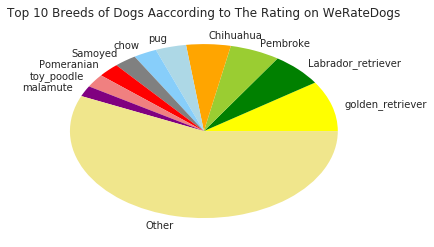

In [88]:
color_set = ['yellow', 'green' , 'yellowgreen', 'orange', 'lightblue', 'lightskyblue', 'grey', 'red', 'lightcoral', 'purple', 'khaki']
plt.pie(top10_total, labels = top10_total.index, colors = color_set)
plt.title('Top 10 Breeds of Dogs Aaccording to The Rating on WeRateDogs')
plt.savefig('Top10_DogBreed pieplot.png', dpi=300, bbox_inches = "tight")
plt.show()

### Correlation between retweet_count and favorite_count
- The most liked tweets are the most retweeted

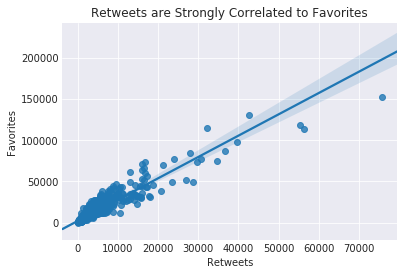

In [89]:
g = sns.regplot(x=df_master.retweet_count, y=df_master.favorite_count)
plt.title("Retweets are Strongly Correlated to Favorites")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.show()
fig = g.get_figure()
fig.savefig('retweet_fav_corr.png');

In [90]:
#check values of correlations among variables 
#retweet_count and favorites_count have relatively similar occurences 
df_master.corr()

,tweet_id,rating_numerator,rating_denominator,img_num,confidence_1,breed_1,confidence_2,breed_2,confidence_3,breed_3,retweet_count,favorite_count
tweet_id,1.000000,0.024581,-0.017439,0.215584,0.102261,0.120038,-0.000867,0.124387,-0.044639,0.096418,0.384026,0.611056
rating_numerator,0.024581,1.000000,0.185918,-0.002772,-0.006617,-0.031455,-0.019503,-0.034964,-0.004832,-0.031569,0.018626,0.016497
rating_denominator,-0.017439,0.185918,1.000000,-0.017000,0.008199,-0.004676,-0.032043,-0.005953,0.006701,-0.000378,-0.017393,-0.024350
img_num,0.215584,-0.002772,-0.017000,1.000000,0.202839,0.032601,-0.156512,0.057272,-0.137930,0.059426,0.104799,0.130770
confidence_1,0.102261,-0.006617,0.008199,0.202839,1.000000,0.126720,-0.510759,0.142942,-0.707432,0.118536,0.046821,0.069134
breed_1,0.120038,-0.031455,-0.004676,0.032601,0.126720,1.000000,0.110752,0.639093,0.050151,0.560755,0.000965,0.042080
confidence_2,-0.000867,-0.019503,-0.032043,-0.156512,-0.510759,0.110752,1.000000,0.097003,0.481735,0.064833,-0.014193,-0.016293
breed_2,0.124387,-0.034964,-0.005953,0.057272,0.142942,0.639093,0.097003,1.000000,0.033110,0.558320,0.011794,0.051583
confidence_3,-0.044639,-0.004832,0.006701,-0.137930,-0.707432,0.050151,0.481735,0.033110,1.000000,0.035711,-0.038083,-0.045944
breed_3,0.096418,-0.031569,-0.000378,0.059426,0.118536,0.560755,0.064833,0.558320,0.035711,1.000000,0.005652,0.033782


### Distribution of tweets' sources in WeRateDog
- Twitter for iphone is the most common source of tweets, then far behind other sources

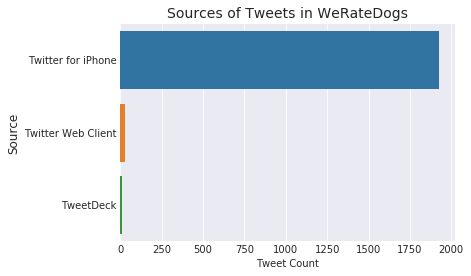

In [91]:
sns.countplot(data = df_master, y = 'source') 
plt.title('Sources of Tweets in WeRateDogs', fontsize=14) 
plt.xlabel('Tweet Count', fontsize=10) 
plt.ylabel('Source', fontsize=12) 
plt.savefig('tweet_source.png'); 

### Common dogs' names in WeRateDogs
- Oliver and Cooper are the most common dog' names

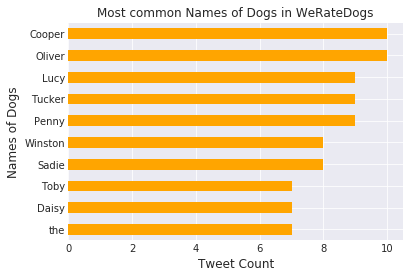

In [92]:
#create a list of top 10 names of dogs and sort it in descending order
#Then plot a horizontal bar for the top10 names of dogs
top10_names = df_master.name.value_counts()[1:11].sort_values (axis=0, ascending=True) 
top10_names.plot(kind = 'barh', color='orange') 
plt.xlabel('Tweet Count', fontsize=12) 
plt.ylabel('Names of Dogs', fontsize=12) 
plt.title('Most common Names of Dogs in WeRateDogs')
plt.savefig('name.png'); 

### Distribution of developmental dog stages in WeRateDogs 
- The majority of tweets do not mention the dog stage, however, pupper is the most commonly tweeted dog stage

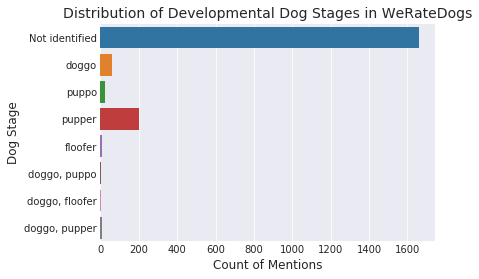

In [93]:
sns.countplot(data = df_master, y = 'dog_stage') 
plt.title('Distribution of Developmental Dog Stages in WeRateDogs', fontsize=14) 
plt.xlabel('Count of Mentions', fontsize=12) 
plt.ylabel('Dog Stage', fontsize=12) 
plt.savefig('dog_stage.png'); 

### Most common rating score in WeRateDogs

In [95]:
#create rating_score column by combing the rating numerator and rating denominator as a string
df_master['rating_score'] = df_master['rating_numerator'].astype(str) + "/" + df_master['rating_denominator'].astype(str)
#check the value counts of rating_score column
df_master.rating_score.value_counts()

12.0/10      444
10.0/10      416
11.0/10      392
13.0/10      249
9.0/10       149
8.0/10        95
7.0/10        51
14.0/10       33
6.0/10        32
5.0/10        32
3.0/10        19
4.0/10        15
2.0/10         9
1.0/10         4
44.0/40        1
50.0/50        1
7.0/11         1
4.0/20         1
99.0/90        1
165.0/150      1
11.26/10       1
0.0/10         1
204.0/170      1
121.0/110      1
13.5/10        1
9.75/10        1
1.0/2          1
88.0/80        1
24.0/7         1
9.0/11         1
11.27/10       1
84.0/70        1
144.0/120      1
1776.0/10      1
45.0/50        1
80.0/80        1
60.0/50        1
420.0/10       1
Name: rating_score, dtype: int64

In [96]:
total_rating = df_master['rating_score'].value_counts()
top10_score = total_rating[0:10]
other = total_rating[10:]

In [97]:
# Combine the breeds in others variable into a single value for plotting.
top10_score.at['Other'] = other.sum()
top10_score

12.0/10    444
10.0/10    416
11.0/10    392
13.0/10    249
9.0/10     149
8.0/10      95
7.0/10      51
14.0/10     33
6.0/10      32
5.0/10      32
Other       71
Name: rating_score, dtype: int64

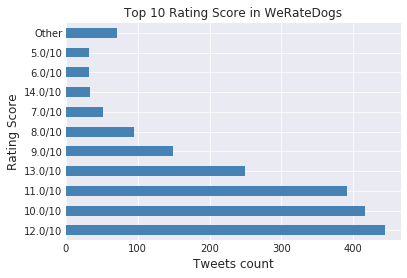

In [98]:
top10_score.plot(kind = 'barh', color='steelblue') 
plt.title('Top 10 Rating Score in WeRateDogs')
plt.xlabel('Tweets count', fontsize=12) 
plt.ylabel('Rating Score', fontsize=12) 
plt.savefig('rating.png'); 

In [101]:
ls

dog_stage.png          retweet_fav_corr.png        tweet_source.png
image_predictions.tsv  source.png                  twitter-archive-enhanced.csv
name.png               Top10_DogBreed pieplot.png  twitter_archive_master.csv
rating.png             tweet_json.txt              wrangle_act.ipynb
